In [ ]:
from tensorflow.keras.datasets import imdb

## Data Preparation

### Load Data

In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

### Pre-processing

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension), dtype='int')
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

## Model Design

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential(
    [
     layers.Dense(units=16, activation='relu', input_shape=(10000,)),
     layers.Dense(units=16, activation='relu'),
     layers.Dense(units=1, activation='sigmoid')
    ]
)

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 16)                160016    
                                                                 
 dense_17 (Dense)            (None, 16)                272       
                                                                 
 dense_18 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


## Training

### Train Parameters

In [ ]:
from tensorflow.keras import optimizers, losses

model.compile(optimizer=optimizers.SGD(),
              loss=losses.binary_crossentropy,
              metrics=["accuracy"])

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### Train Loop

In [ ]:
history = model.fit(x=partial_x_train, y=partial_y_train,
                    batch_size=512,
                    epochs=40,
                    validation_data=(x_val, y_val)
                    )

Epoch 1/40
30/30 [==============================] - 3s 68ms/step - loss: 0.6916 - accuracy: 0.5258 - val_loss: 0.6873 - val_accuracy: 0.5652
Epoch 2/40
30/30 [==============================] - 2s 57ms/step - loss: 0.6838 - accuracy: 0.5847 - val_loss: 0.6779 - val_accuracy: 0.6163
Epoch 3/40
30/30 [==============================] - 2s 58ms/step - loss: 0.6716 - accuracy: 0.6395 - val_loss: 0.6629 - val_accuracy: 0.6770
Epoch 4/40
30/30 [==============================] - 2s 58ms/step - loss: 0.6548 - accuracy: 0.6945 - val_loss: 0.6458 - val_accuracy: 0.7139
Epoch 5/40
30/30 [==============================] - 2s 57ms/step - loss: 0.6366 - accuracy: 0.7293 - val_loss: 0.6279 - val_accuracy: 0.7460
Epoch 6/40
30/30 [==============================] - 2s 57ms/step - loss: 0.6184 - accuracy: 0.7545 - val_loss: 0.6106 - val_accuracy: 0.7652
Epoch 7/40
30/30 [==============================] - 2s 58ms/step - loss: 0.6004 - accuracy: 0.7733 - val_loss: 0.5933 - val_accuracy: 0.7813
Epoch 8/40
30

## Evaluation

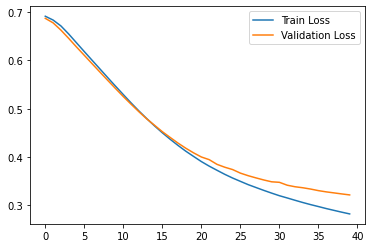

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()

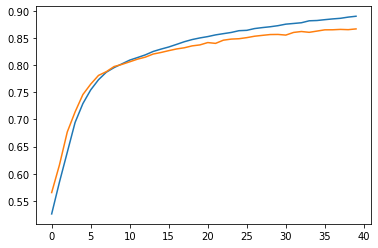

In [ ]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 3s 3ms/step - loss: 0.3279 - accuracy: 0.8647


In [ ]:
preds = model.predict(x_test)

In [ ]:
print(f'Prediction: {preds[0]}')
print(f'True Label: {y_test[0]}')

Prediction: [0.36911786]
True Label: 0.0
